In [ ]:
# Define experimental lattice parameters for various materials
# Each entry includes the crystal structure and lattice constants (a, and c for hcp)

lattice_data = {
    'Ti': {'structure': 'hcp', 'a': 2.95, 'c': 4.68},  # Titanium, hexagonal close-packed
    'Cr': {'structure': 'bcc', 'a': 2.88},             # Chromium, body-centered cubic
    'Ni': {'structure': 'fcc', 'a': 3.52},             # Nickel, face-centered cubic
    'Zr': {'structure': 'hcp', 'a': 3.23, 'c': 5.15},  # Zirconium, hexagonal close-packed
    'Mo': {'structure': 'bcc', 'a': 3.15},             # Molybdenum, body-centered cubic
    'Pd': {'structure': 'fcc', 'a': 3.89},             # Palladium, face-centered cubic
    'Hf': {'structure': 'hcp', 'a': 3.19, 'c': 5.05},  # Hafnium, hexagonal close-packed
    'W':  {'structure': 'bcc', 'a': 3.16},             # Tungsten, body-centered cubic
    'Pt': {'structure': 'fcc', 'a': 3.92}              # Platinum, face-centered cubic
}

In [34]:
from ase.build import bulk
from flapw_python.flapw_calculator import FlapwCalculator

lapwin_format = './infiles/lapwinNOSPIN'
lapwout = './lapwoutSCF'
command='./flapw_python/run_flapw.sh'

In [ ]:
# # Select the element and retrieve its structure and initial lattice constant
# symbol = 'Pd'
# data = lattice_data[symbol]
# crystal = data['structure']
# a = data['a']  # Initial lattice parameter (experimental)

# Select hcp element and extract lattice parameters
symbol = 'Ti'
data = lattice_data[symbol]
crystal = data['structure']
a = data['a']
c = data['c']

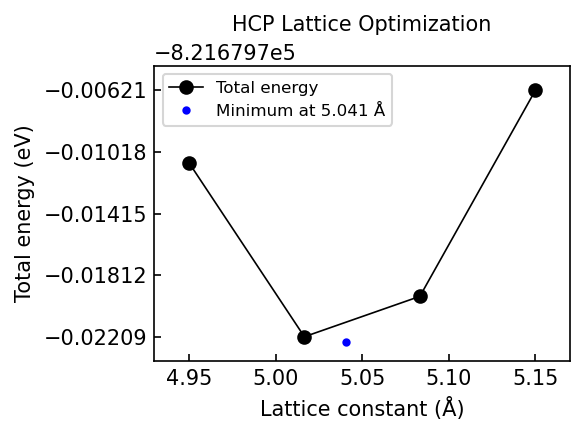

In [ ]:
from flapw_python import optimize_lattice as opt

# Optimize lattice constant 'a' for fcc/bcc structure
a_opt, e_opt, a_list, energies = opt.optimize_lattice(
    symbol=symbol, 
    structure=crystal, 
    a0=a,           # Initial guess for lattice constant
    da=0.1,         # Search range: ±0.1 Å from a0
    n=4,            # Number of points to sample
    lapwin_format=lapwin_format,
    lapwout=lapwout,
    command=command
)

# Plot the energy vs. lattice constant curve and save the figure
opt.plot_optimization_result(
    structure=crystal, 
    a_or_c_list=a_list, 
    energies=energies, 
    a_opt=a_opt, 
    e_opt=e_opt, 
    figsize=(4, 3),
    output_file=f'./attachments/fig_latt_opt_{symbol}.png'
)

#####################################

# # Optimize lattice constant 'a' for hcp (with fixed c)
# a_opt, c0, e_opt, a_list, energies = opt.optimize_lattice(
#     symbol=symbol, 
#     structure=crystal, 
#     a0=a,
#     c0=c,
#     da=0.1,        # ±0.1 Å range around initial a
#     n=4,           # Number of points to sample in each direction
#     hcp_mode='a_only',  # Enable a-only optimization mode for hcp
#     lapwin_format=lapwin_format,
#     lapwout=lapwout,
#     command=command
# )

# # Plot and save the result
# opt.plot_optimization_result(
#     structure=crystal, 
#     a_or_c_list=a_list, 
#     energies=energies, 
#     a_opt=a_opt, 
#     e_opt=e_opt, 
#     figsize=(4, 3),
#     output_file=f'./attachments/fig_latt_opt_{symbol}_aOnly.png'
# )

#####################################

# # Optimize lattice constant 'c' for hcp (with fixed a)
# a0, c_opt, e_opt, c_list, energies = opt.optimize_lattice(
#     symbol=symbol, 
#     structure=crystal, 
#     a0=a_opt,
#     c0=c,
#     da=0.1,            # ±0.1 Å range around initial c
#     n=4,               # Number of points to sample in each direction
#     hcp_mode='c_only', # Enable c-only optimization mode for hcp
#     lapwin_format=lapwin_format,
#     lapwout=lapwout,
#     command=command
# )

# # Plot and save the result
# opt.plot_optimization_result(
#     structure=crystal, 
#     a_or_c_list=c_list, 
#     energies=energies, 
#     a_opt=c_opt, 
#     e_opt=e_opt, 
#     figsize=(4, 3),
#     output_file=f'./attachments/fig_latt_opt_{symbol}_cOnly.png'
# )

In [ ]:
# Perform DOS calculation for fcc/bcc system
# Use the bash script specifically for DOS generation
command_dos = './flapw_python/run_flapw_dos.sh'

# Build the bulk structure using the optimized lattice constant
atoms = bulk(symbol, crystalstructure=crystal, a=a_opt)

# Assign the FLAPW calculator with DOS-specific command
atoms.calc = FlapwCalculator(
    lapwin_format=lapwin_format,
    lapwout=lapwout,
    a=a_opt,
    command=command_dos
)

# Run the calculation and retrieve the total energy
energy = atoms.get_potential_energy()
print(energy)

#####################################

# # Calculate DOS for hcp system
# command_dos = './flapw_python/run_flapw_dos.sh'

# # Build the bulk hcp structure with optimized a and c
# atoms = bulk(symbol, crystalstructure=crystal, a=a_opt, c=c_opt)

# # Assign the FLAPW calculator with DOS-specific command
# atoms.calc = FlapwCalculator(
#     lapwin_format=lapwin_format,
#     lapwout=lapwout,
#     a=a_opt,
#     command=command_dos
# )

# # Run the calculation and get the total energy
# energy = atoms.get_potential_energy()
# print(energy)

dyld[74378]: symbol '__ZNKSt3__119bad_expected_accessIvE4whatEv' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[74378]: symbol '__ZTINSt3__119bad_expected_accessIvEE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/IsolatedCoreAudioClient is being set to 0xBAD4007.
dyld[74378]: symbol '__ZTINSt3__13pmr15memory_resourceE' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/caulk.framework/Versions/A/caulk is being set to 0xBAD4007.
dyld[85002]: symbol '__ZNKSt3__119bad_expected_accessIvE4whatEv' missing from root that overrides /usr/lib/libc++.1.dylib. Use of that symbol in /System/Library/PrivateFrameworks/IsolatedCoreAudioClient.framework/Versions/A/

Read Results
-821679.7143300428


mkdir: DOS/: File exists


xmin = 0.0 xmax = 1.797855
ymin = -10.0 ymax = 10.0


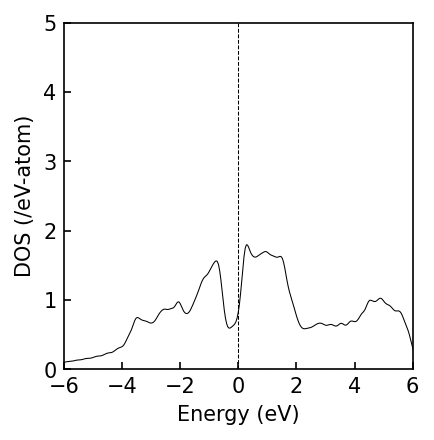

In [ ]:
from flapw_python import dos_plotter

output_file = './attachments/'

# Generate and save the DOS plot for fcc/bcc system
dos_plotter.plot_dos(
    file_path='DOS/dos.xy',              # Path to the DOS data
    number_of_atoms=len(atoms),          # Normalize DOS by number of atoms
    figsize=(3, 3),                       # Set figure size
    output_file=output_file + f'fig_dos_{symbol}.png'
)